- podemos usar kmeans para agrupar en 2 clases y ver si logra un mejor desempeño que la regresión logística
- probar un random forest
- Red Neuronal: topologías diferentes, cantidad de neuronas en cada capa, cantidad de capas, tasas de aprendizaje diferentes, y datos diferentes. Te recomiendo hacer una tabla en donde en un eje coloques las configuraciones y en otro eje coloques las tasas de aprendizaje.
  - Como las redes neuronales pueden sobreentrenarse o subentrenarse, es importante que experimentes con porcentajes diferentes de datasets y veas si mejoran o empeoran su desempeño. Utiliza K-fold si quieres resultados más confiables, y recuerda que, con cada valor de K, tienes que realizar K entrenamientos.
- Máquina de soporte vectorial (SVM) 

# Librerías y funciones auxiliares

In [85]:
#Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
c_background = '#FFFFFF'

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/MGuadalupeVazquez/Proyecto-final-BEDU/main/water_clean.csv', index_col=0)
df.head()

,ph,hardness,solids,chloramines,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,3.7161,129.4229,18630.0579,6.6352,592.8854,15.1800,56.3291,4.5007,0
1,8.0991,224.2363,19909.5417,9.2759,418.6062,16.8686,66.4201,3.0559,0
2,8.3168,214.3734,22018.4174,8.0593,363.2665,18.4365,100.3417,4.6288,0
3,9.0922,181.1015,17978.9863,6.5466,398.4108,11.5583,31.9980,4.0751,0
4,5.5841,188.3133,28748.6877,7.5449,280.4679,8.3997,54.9179,2.5597,0


In [87]:
def metricas(cnf_matrix, y_test, y_pred):
  tn, fp, fn, tp = cnf_matrix.ravel()
  print("Precisión:",metrics.precision_score(y_test, y_pred, zero_division=False))
  print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
  print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
  print("Especificidad:", tn / (tn + fp))

In [88]:
def matriz_de_confusion(y_test,y_pred):
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  class_names=[0,1]
  fig, ax = plt.subplots(figsize=(6, 6))
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  
  # Creamos un heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="PuBu",
            center=500, fmt='g', cbar=False, annot_kws={"size": 20})
  ax.xaxis.set_label_position("bottom")
  plt.tight_layout()
  plt.ylabel('Realidad', fontsize=15, y=0.5)
  plt.xlabel('Estimado por el modelo', fontsize=15);
  return cnf_matrix

# Rellenando datos faltantes de la columna sulfate

In [89]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/MGuadalupeVazquez/Proyecto-final-BEDU/main/drinking_water_potability.csv')
df_raw.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8905,20791.3190,7.3002,368.5164,564.3087,10.3798,86.9910,2.9631,0
1,3.7161,129.4229,18630.0579,6.6352,NaN,592.8854,15.1800,56.3291,4.5007,0
2,8.0991,224.2363,19909.5417,9.2759,NaN,418.6062,16.8686,66.4201,3.0559,0
3,8.3168,214.3734,22018.4174,8.0593,356.8861,363.2665,18.4365,100.3417,4.6288,0
4,9.0922,181.1015,17978.9863,6.5466,310.1357,398.4108,11.5583,31.9980,4.0751,0


In [90]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Según lo observado en la primera parte de *Análisis Exploratorio de datos* eliminaremos las filas con NaN's en las columnas `pH` y `trihalomethanes`.

In [91]:
raw = df_raw[df_raw['ph'].notna()]
raw = raw[raw['Trihalomethanes'].notna()]
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2649 entries, 1 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2649 non-null   float64
 1   Hardness         2649 non-null   float64
 2   Solids           2649 non-null   float64
 3   Chloramines      2649 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2649 non-null   float64
 6   Organic_carbon   2649 non-null   float64
 7   Trihalomethanes  2649 non-null   float64
 8   Turbidity        2649 non-null   float64
 9   Potability       2649 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 227.6 KB


In [92]:
completos = raw.loc[raw['Sulfate'].notna()]
completos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [93]:
faltantes = raw.loc[raw['Sulfate'].isna()]
faltantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 1 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               638 non-null    float64
 1   Hardness         638 non-null    float64
 2   Solids           638 non-null    float64
 3   Chloramines      638 non-null    float64
 4   Sulfate          0 non-null      float64
 5   Conductivity     638 non-null    float64
 6   Organic_carbon   638 non-null    float64
 7   Trihalomethanes  638 non-null    float64
 8   Turbidity        638 non-null    float64
 9   Potability       638 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 54.8 KB


In [94]:
# obtenemos los datos para entrenamiento y los separamos
X = completos[['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = completos['Sulfate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

Con regresión lineal:

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [96]:
#creamos el modelo
lin_model = LinearRegression()

#entrenamos el modelo
lin_model.fit(X_train, y_train)

#predicciones
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(y_train,y_train_predict)
print("Train: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Test: MSE ="+str(MSE))

Train: MSE =1634.8878615223616
Test: MSE =1612.8542565767198


# Antes del entrenamiento de los modelos

In [97]:
# Normalización de las variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

vars_indep = df.columns[:-1]
var_dep = df.iloc[:,-1]

df_normalizado = sc.fit_transform(df.iloc[:,:-1])
df_normalizado = pd.DataFrame(df_normalizado, columns = vars_indep)

from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 0)
X_resambled, y_resampled = ros.fit_resample(df_normalizado, var_dep)

df_normalizado.head()
#from sklearn import preprocessing
#df_standardized = preprocessing.scale(df.iloc[:,:-1])
#df_standardized = pd.DataFrame(df_standardized)
#df_standardized

,ph,hardness,solids,chloramines,conductivity,organic_carbon,trihalomethanes,turbidity
0,-2.1235,-2.0347,-0.3790,-0.3101,2.0385,0.2647,-0.6289,0.6803
1,0.6432,0.8484,-0.2318,1.3549,-0.1108,0.7742,-0.0044,-1.1709
2,0.7806,0.5485,0.0109,0.5878,-0.7932,1.2473,2.0948,0.8445
3,1.2701,-0.4632,-0.4539,-0.3660,-0.3598,-0.8281,-2.1346,0.1350
4,-0.9443,-0.2439,0.7853,0.2635,-1.8143,-1.7811,-0.7162,-1.8067


In [98]:
pd.options.display.float_format = '{:.4f}'.format #suprimir notación científica

In [99]:
df_normalizado.describe().loc[['mean', 'std', 'min', 'max']]

,ph,hardness,solids,chloramines,conductivity,organic_carbon,trihalomethanes,turbidity
mean,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-4.4691,-3.7354,-2.4857,-4.1593,-3.0350,-3.6518,-4.0691,-3.2286
max,4.3679,3.8554,4.0208,3.7831,4.0173,3.8332,3.5588,3.2355


Separamos el dataset para entrenar todos los modelos con los mismos datos:

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_resambled, y_resampled, test_size=0.2, random_state=9)

# Regresión logística

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
# Creamos el modelo
logreg = LogisticRegression()

# Ajustamos el modelo de regresión
logreg.fit(X_train, y_train)

# Realizamos predicciones con el conjunto de prueba
y_pred = logreg.predict(X_test)

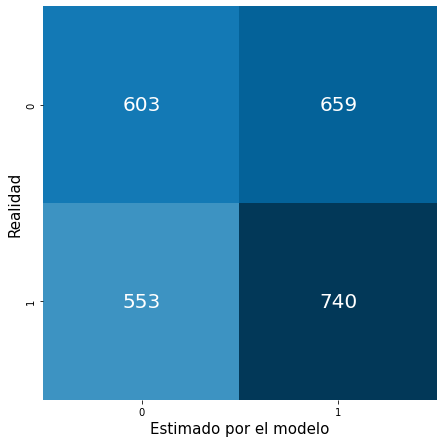

In [103]:
y_train_pred = logreg.predict(X_train)
cnf_matrix= matriz_de_confusion(y_train, y_train_pred)

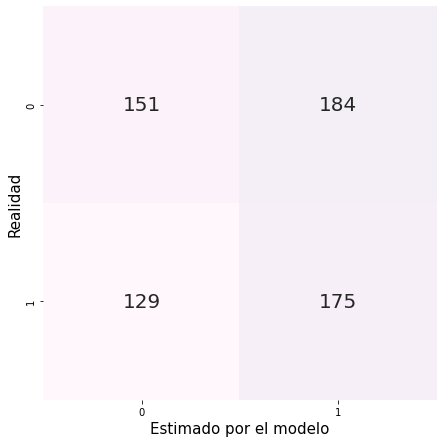

In [104]:
cnf_matrix= matriz_de_confusion(y_test, y_pred)

In [105]:
metricas(cnf_matrix, y_test, y_pred)

Precisión: 0.48746518105849584
Exactitud: 0.5101721439749609
Sensibilidad: 0.5756578947368421
Especificidad: 0.4507462686567164


# Algoritmo kNN (supervisado)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

# creamos el modelo con 2 grupos pues tenemos 2 clases
knn = KNeighborsClassifier(n_neighbors=2)

# entrenamos el modelo
knn.fit(X_train, y_train)

# realizamos predicciones con el conjunto de prueba
y_pred = knn.predict(X_test)

# calculamos exactitud
knn.score(X_test, y_test)

0.651017214397496

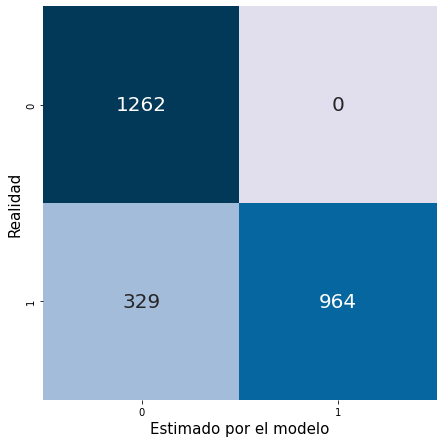

In [107]:
y_train_pred = knn.predict(X_train)
cnf_matrix= matriz_de_confusion(y_train, y_train_pred)

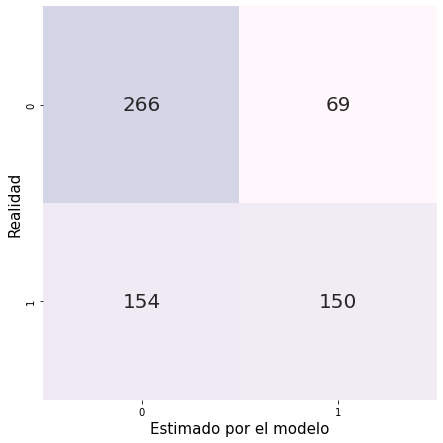

In [108]:
cnf_matrix= matriz_de_confusion(y_test, y_pred)

In [109]:
metricas(cnf_matrix, y_test, y_pred)

Precisión: 0.684931506849315
Exactitud: 0.651017214397496
Sensibilidad: 0.4934210526315789
Especificidad: 0.7940298507462686


# Algoritmo K-means (no supervisado)

In [110]:
from sklearn.cluster import KMeans

Primero intentaremos agrupar todo el conjunto de datos ya normalizado en las dos clases que tenemos. Para esto, aplicaremos el método del codo, con el fin de obtener el número óptimo de clusters para dividir nuestros datos.

In [111]:
# Aplicar el método del codo
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(df_normalizado)
    wcss.append(kmeans.inertia_)
wcss

[21192.0,
 19228.577611111672,
 17921.741810755004,
 16959.635507397834,
 16142.93623732693,
 15484.587793773815,
 14895.280373251846,
 14414.44828514787,
 13936.827274720828]

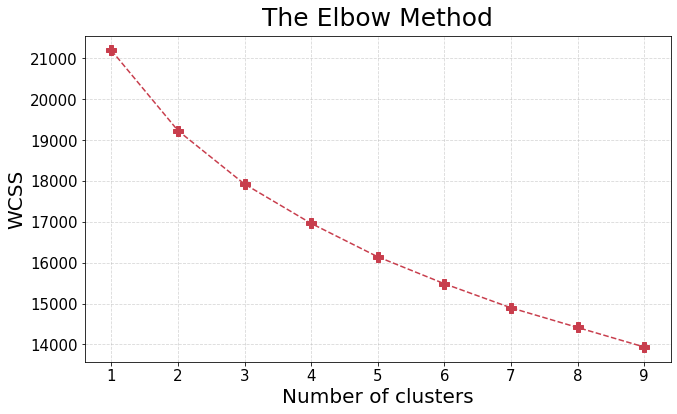

In [112]:
# Mostrar la gráfica del método del codo
plt.figure(figsize=(10.5,6), facecolor=c_background)
plt.axes().set_facecolor(c_background)

plt.plot(range(1, 10), wcss,
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

plt.title('The Elbow Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('WCSS', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [113]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")

kl.elbow

4

Apartir del método del codo, podemos ver que el número óptimo de clusters es 4. Aún así, nosotros usaremos 2 debido a que tenemos 2 clases.

In [115]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=11)

# train and prediction on our normalized data
y_pred = kmeans.fit_predict(df_normalizado)
y_pred = y_pred + 1

np.putmask(y_pred, y_pred==2, 0)

Generamos la matriz de confusión y calculamos las métricas:

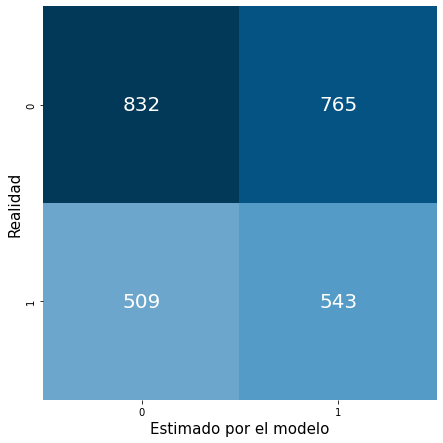

In [116]:
cnf_matrix = matriz_de_confusion(var_dep, y_pred)

El modelo de K-means agrupa muchos datos en los clusters incorrectos, por lo mismo, tenemos una alta cantidad de falsos negativos y positivos.

In [117]:
metricas(cnf_matrix, var_dep, y_pred)

Precisión: 0.4151376146788991
Exactitud: 0.5190637976594942
Sensibilidad: 0.5161596958174905
Especificidad: 0.5209768315591734


In [118]:
df_graficas = df.iloc[:,:-1]
df_graficas['cluster'] = y_pred

variables_cluster = np.append(df.columns[:-1], 'cluster')

In [119]:
# Paleta de colores para los clusters
colores_cluster = ['#ffd166', '#118ab2']

# Configuración del pairplot
sns.pairplot(df_graficas[variables_cluster], 
             hue='cluster', 
             palette=colores_cluster, 
             height=3, aspect=1.5,
             plot_kws= dict(s=120),
             corner = False
            )

Output hidden; open in https://colab.research.google.com to view.

Era de esperarse que tendríamos valores muy bajos en todas las métricas, y podemos verificar que todas son muy cercanas al 50%. Como se mencionó anteriormente, eso se debe a que tenemos un alto número de falsos negativos y positivos, por lo tanto, tenemos muy pocas agrupaciones correctas en la diagonal.

Ahora, intentaremos ajustar el modelo de K-means con 2 clusters a nuestros datos de entrenamiento:

In [120]:
# Entrenamos con X_train
modelo_kmeans = KMeans(n_clusters = 2).fit(X_train)

# Extraemos los centroides.
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[-0.34670916 -0.53282068  0.38677461  0.05862375  0.1577092  -0.29891027
   0.2086709   0.27352579]
 [ 0.30714846  0.50912806 -0.31776349 -0.03144974 -0.16014815  0.28424707
  -0.19034935 -0.24561616]]


Predecimos a que cluster pertenecen los datos de prueba:

In [121]:
labels = modelo_kmeans.predict(X_test)

pred_df = pd.DataFrame({'actual': y_test, 'predicción': labels})
pred_df

,actual,predicción
2992,1,0
392,0,0
282,1,0
2064,0,0
1517,0,0
...,...,...
2964,1,0
1200,1,0
2581,1,1
1375,0,1


A continuación, generamos la matriz de confusión:

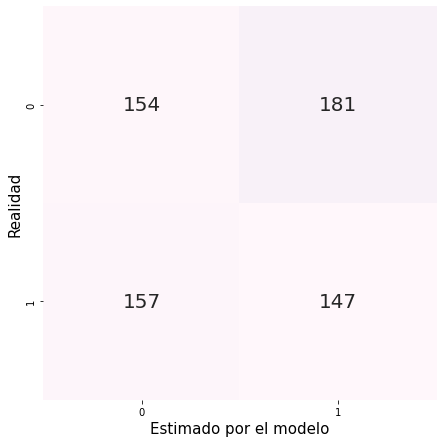

In [122]:
cnf_matrix = matriz_de_confusion(y_test, labels)

Igual que con el modelo entrenado con el dataset completo, seguimos teniendo problemas para agrupar los verdaderos positivos y los verdaderos negativos, lo cual se refleja en los resultados de las métricas.

In [123]:
metricas(cnf_matrix, y_test, labels)

Precisión: 0.4481707317073171
Exactitud: 0.47104851330203446
Sensibilidad: 0.48355263157894735
Especificidad: 0.4597014925373134


Por último, intentaremos seleccionar algunas variables relevantes para ver si mejora un poco la agrupación de los datos en los dos clases de interés.

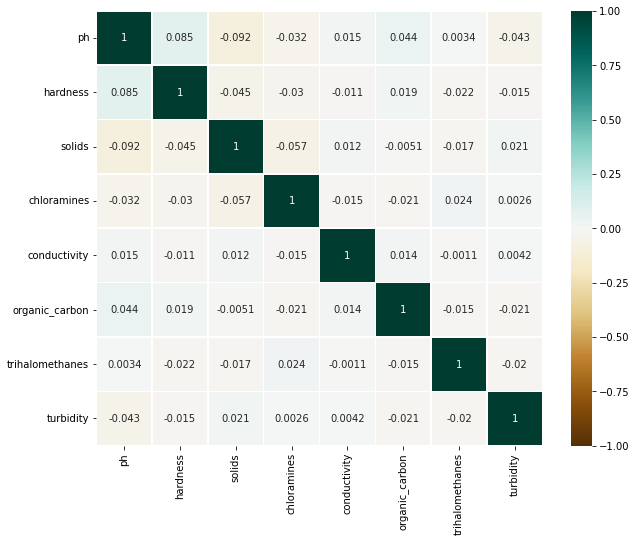

In [124]:
# Creamos un heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_normalizado.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG", linewidths=.5, center=0);

In [125]:
# Guardamos el nombre de las variables con la correlación más baja
variables = np.array(['chloramines', 'turbidity'])

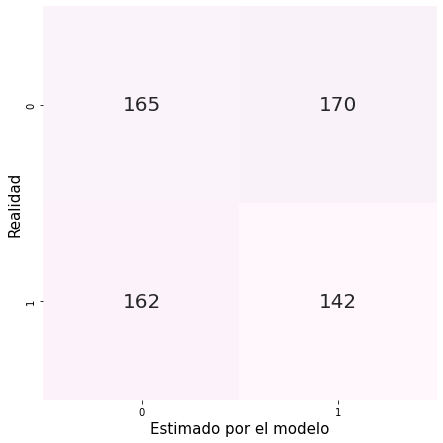

In [126]:
# Entrenamos con X_train
modelo_kmeans = KMeans(n_clusters = 2).fit(X_train[variables])

# Centroides
centroides = modelo_kmeans.cluster_centers_

# Predicción con los datos de prueba
labels = modelo_kmeans.predict(X_test[variables])

# Matriz de confusión
cnf_matrix = matriz_de_confusion(y_test, labels)

In [127]:
metricas(cnf_matrix, y_test , labels)

Precisión: 0.4551282051282051
Exactitud: 0.48043818466353677
Sensibilidad: 0.46710526315789475
Especificidad: 0.4925373134328358


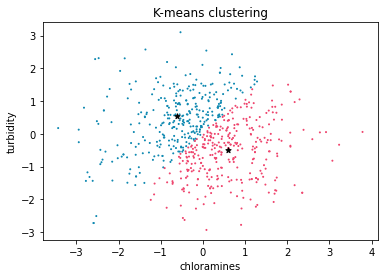

In [128]:
colores=['#ef476f', '#118ab2']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(X_test['chloramines'], X_test['turbidity'], c=asignar, s=1)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='*', c='black', s=30) # Marco centroides.
plt.xlabel('chloramines')
plt.ylabel('turbidity')
plt.title('K-means clustering')
plt.show()

Como podemos ver, tuvimos resultados similares a los obtenidos usando las 8 características. Por lo cual, podemos decir que el método de K-means no es el adecuado para separar nuestros datos en los dos grupos.

# Random forest

In [129]:
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest

random_seed = 9

## Un árbol

Fue necesario disminuir la profundidad del árbol para evitar overfitting.

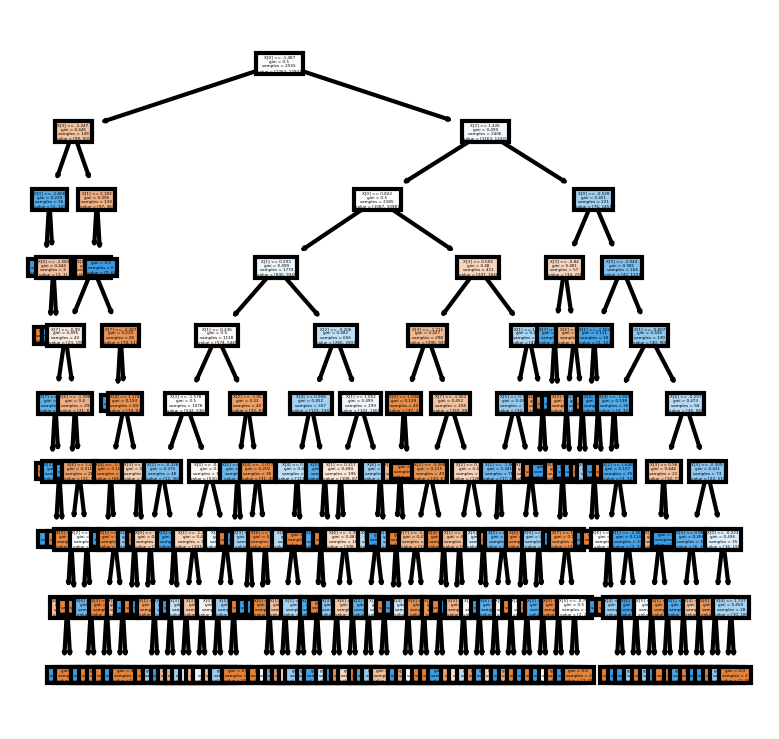

In [130]:
arbol = treeClassifier.DecisionTreeClassifier(random_state=random_seed, max_depth=9)
arbol = arbol.fit(X_train, y_train)

plt.figure(figsize = (3,3), dpi = 300)
treeClassifier.plot_tree(arbol,filled = True);
plt.show()

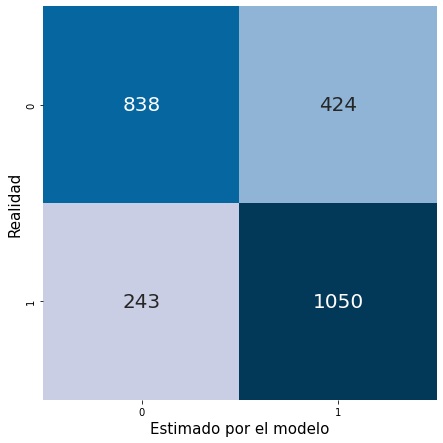

In [131]:
y_train_pred = arbol.predict(X_train)
cnf_matrix= matriz_de_confusion(y_train, y_train_pred)

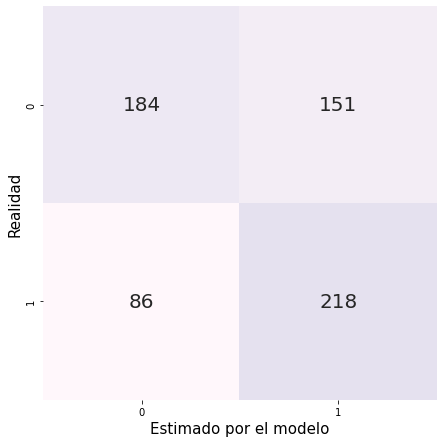

In [132]:
y_pred = arbol.predict(X_test)
cnf_matrix= matriz_de_confusion(y_test, y_pred)

In [133]:
metricas(cnf_matrix, y_test, y_pred)

Precisión: 0.5907859078590786
Exactitud: 0.6291079812206573
Sensibilidad: 0.7171052631578947
Especificidad: 0.5492537313432836


Utilizando únicamente algunas variables:

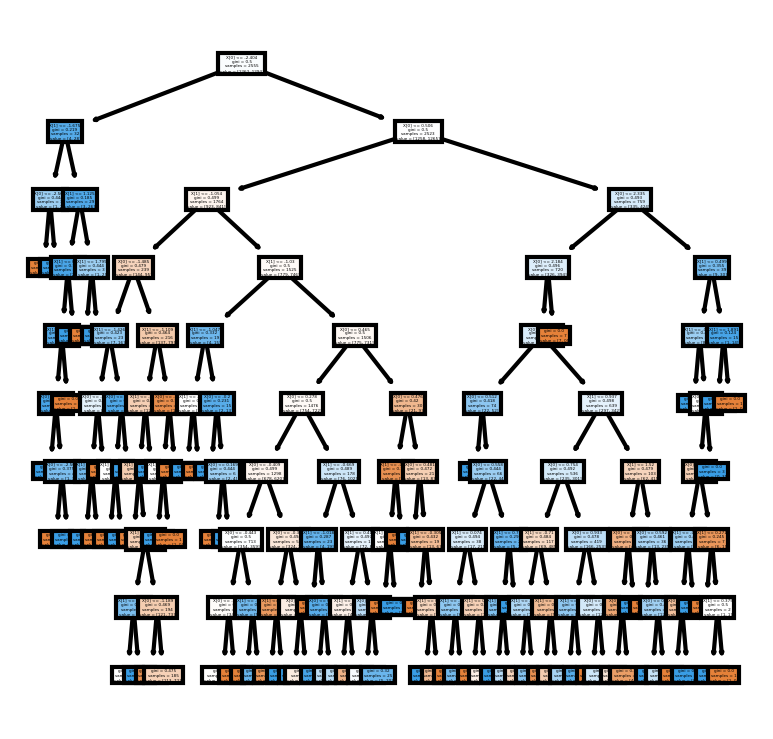

In [134]:
arbol = treeClassifier.DecisionTreeClassifier(random_state=random_seed, max_depth=9)
arbol = arbol.fit(X_train[variables], y_train)

plt.figure(figsize = (3,3), dpi = 300)
treeClassifier.plot_tree(arbol,filled = True);
plt.show()

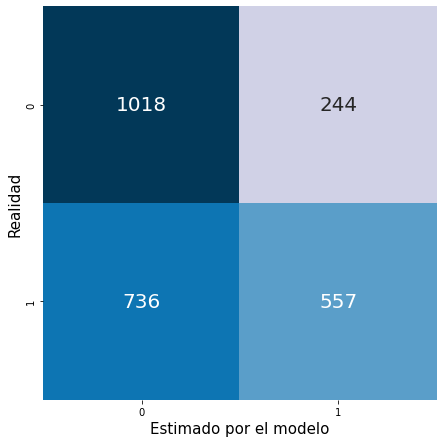

In [135]:
y_train_pred = arbol.predict(X_train[variables])
cnf_matrix= matriz_de_confusion(y_train, y_train_pred)

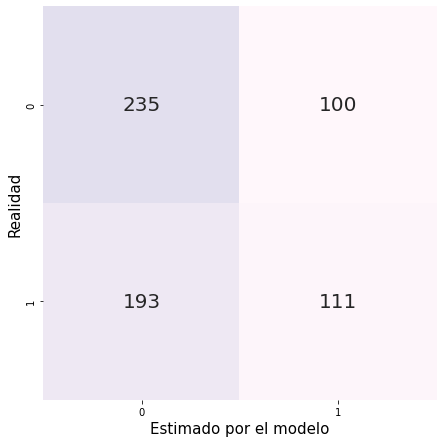

In [136]:
y_pred = arbol.predict(X_test[variables])
cnf_matrix= matriz_de_confusion(y_test, y_pred)

In [137]:
metricas(cnf_matrix, y_test, y_pred)

Precisión: 0.5260663507109005
Exactitud: 0.5414710485133021
Sensibilidad: 0.3651315789473684
Especificidad: 0.7014925373134329


## Bosque

In [138]:
bosque = forest(n_estimators = 800, max_depth=10)
bosque.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=800)

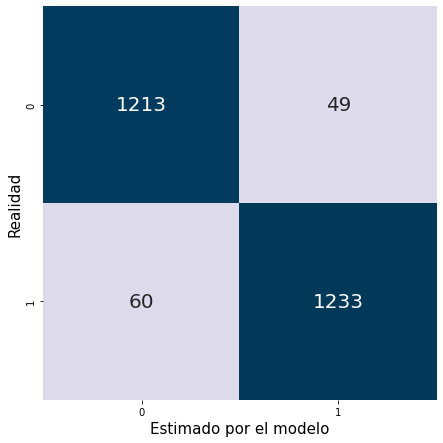

In [139]:
y_train_pred = bosque.predict(X_train)
cnf_matrix= matriz_de_confusion(y_train, y_train_pred)

In [140]:
y_pred = bosque.predict(X_test)

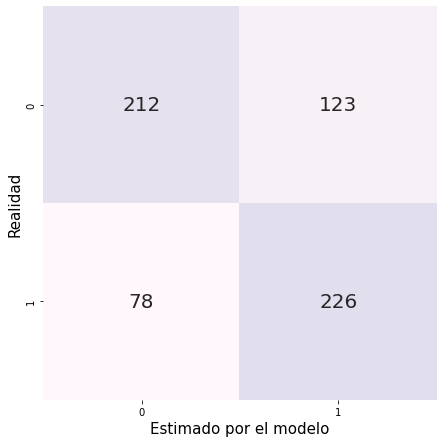

In [141]:
cnf_matrix= matriz_de_confusion(y_test, y_pred)

In [142]:
metricas(cnf_matrix, y_test, y_pred)

Precisión: 0.6475644699140402
Exactitud: 0.6854460093896714
Sensibilidad: 0.743421052631579
Especificidad: 0.6328358208955224


# Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

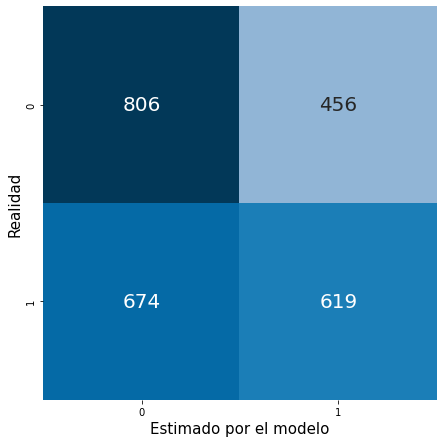

In [145]:
y_train_pred = gnb.predict(X_train)
cnf_matrix= matriz_de_confusion(y_train, y_train_pred)

La predicción es mala desde el conjunto de entrenamiento.

# SVM

In [146]:
from sklearn import svm

In [147]:
vector = svm.SVC(kernel='rbf', gamma=0.3, C=10)
vector.fit(X_train, y_train)

SVC(C=10, gamma=0.3)

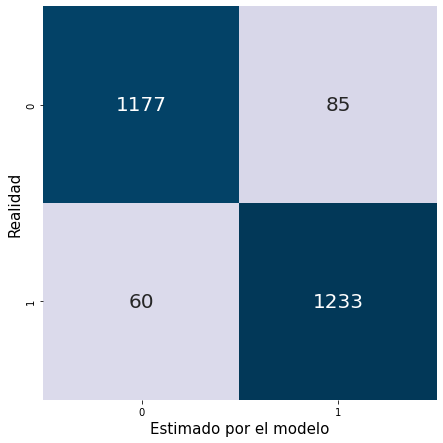

In [148]:
y_train_pred = vector.predict(X_train)
cnf_matrix= matriz_de_confusion(y_train, y_train_pred)

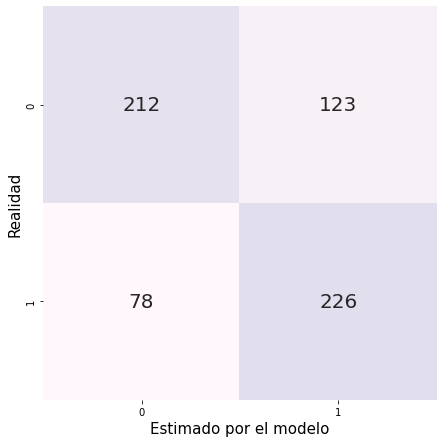

In [149]:
y_pred = bosque.predict(X_test)
cnf_matrix= matriz_de_confusion(y_test, y_pred)

In [150]:
metricas(cnf_matrix, y_test, y_pred)

Precisión: 0.6475644699140402
Exactitud: 0.6854460093896714
Sensibilidad: 0.743421052631579
Especificidad: 0.6328358208955224


# Red neuronal

In [151]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

## Intento 1

In [152]:
model1 = Sequential()
model1.add(Dense(25, input_dim=8, activation='sigmoid')) 
model1.add(Dense(7, activation='sigmoid'))
model1.add(Dense(1, activation='tanh'))
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model1.fit(X_train, y_train, epochs=300)

Epoch 1/300
80/80 [==============================] - 1s 2ms/step - loss: 0.6726 - binary_accuracy: 0.4939
Epoch 2/300
80/80 [==============================] - 0s 2ms/step - loss: 0.2735 - binary_accuracy: 0.4978
Epoch 3/300
80/80 [==============================] - 0s 2ms/step - loss: 0.2525 - binary_accuracy: 0.4932
Epoch 4/300
80/80 [==============================] - 0s 2ms/step - loss: 0.2513 - binary_accuracy: 0.4744
Epoch 5/300
80/80 [==============================] - 0s 2ms/step - loss: 0.2507 - binary_accuracy: 0.4975
Epoch 6/300
80/80 [==============================] - 0s 2ms/step - loss: 0.2502 - binary_accuracy: 0.4947
Epoch 7/300
80/80 [==============================] - 0s 2ms/step - loss: 0.2498 - binary_accuracy: 0.5025
Epoch 8/300
80/80 [==============================] - 0s 2ms/step - loss: 0.2496 - binary_accuracy: 0.5076
Epoch 9/300
80/80 [==============================] - 0s 2ms/step - loss: 0.2495 - binary_accuracy: 0.4947
Epoch 10/300
80/80 [==========================

In [153]:
scores1 = model1.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.2335 - binary_accuracy: 0.6213

binary_accuracy: 62.13%


## Intento 2

In [154]:
model2 = Sequential()
model2.add(Dense(25, input_dim=8, activation='tanh')) 
model2.add(Dense(7, activation='tanh'))
model2.add(Dense(1, activation='tanh'))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model2.fit(X_train, y_train, epochs=500)

Epoch 1/500
80/80 [==============================] - 1s 3ms/step - loss: 0.4269 - binary_accuracy: 0.5068
Epoch 2/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2663 - binary_accuracy: 0.5010
Epoch 3/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2575 - binary_accuracy: 0.5135
Epoch 4/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2533 - binary_accuracy: 0.5303
Epoch 5/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2500 - binary_accuracy: 0.5456
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2469 - binary_accuracy: 0.5577
Epoch 7/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2438 - binary_accuracy: 0.5663
Epoch 8/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2415 - binary_accuracy: 0.5808
Epoch 9/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2406 - binary_accuracy: 0.5828
Epoch 10/500
80/80 [==========================

In [155]:
scores2 = model2.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.2806 - binary_accuracy: 0.5994

binary_accuracy: 59.94%


## Intento 3

In [156]:
model3 = Sequential()
model3.add(Dense(12, input_dim=8, activation='tanh')) 
model3.add(Dense(7, activation='tanh'))
model3.add(Dense(1, activation='tanh'))
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model3.fit(X_train, y_train, epochs=500)

Epoch 1/500
80/80 [==============================] - 1s 2ms/step - loss: 0.4623 - binary_accuracy: 0.4924
Epoch 2/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2749 - binary_accuracy: 0.5065
Epoch 3/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2634 - binary_accuracy: 0.5022
Epoch 4/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2600 - binary_accuracy: 0.5147
Epoch 5/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2570 - binary_accuracy: 0.5198
Epoch 6/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2546 - binary_accuracy: 0.5284
Epoch 7/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2528 - binary_accuracy: 0.5268
Epoch 8/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2505 - binary_accuracy: 0.5256
Epoch 9/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2487 - binary_accuracy: 0.5331
Epoch 10/500
80/80 [==========================

In [157]:
scores3 = model3.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.2563 - binary_accuracy: 0.6150

binary_accuracy: 61.50%


## Intento 4

In [177]:
model4 = Sequential()
model4.add(Dense(25, input_dim=8, activation='tanh')) 
model4.add(Dense(12, activation='tanh'))
model4.add(Dense(7, activation='tanh'))
model4.add(Dense(1, activation='tanh'))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model4.fit(X_train, y_train, epochs=400)

Epoch 1/400
80/80 [==============================] - 1s 3ms/step - loss: 0.3714 - binary_accuracy: 0.5029
Epoch 2/400
80/80 [==============================] - 0s 2ms/step - loss: 0.2552 - binary_accuracy: 0.5119
Epoch 3/400
80/80 [==============================] - 0s 2ms/step - loss: 0.2507 - binary_accuracy: 0.5319
Epoch 4/400
80/80 [==============================] - 0s 3ms/step - loss: 0.2473 - binary_accuracy: 0.5421
Epoch 5/400
80/80 [==============================] - 0s 3ms/step - loss: 0.2438 - binary_accuracy: 0.5699
Epoch 6/400
80/80 [==============================] - 0s 2ms/step - loss: 0.2421 - binary_accuracy: 0.5816
Epoch 7/400
80/80 [==============================] - 0s 2ms/step - loss: 0.2404 - binary_accuracy: 0.5922
Epoch 8/400
80/80 [==============================] - 0s 3ms/step - loss: 0.2381 - binary_accuracy: 0.5906
Epoch 9/400
80/80 [==============================] - 0s 3ms/step - loss: 0.2368 - binary_accuracy: 0.6012
Epoch 10/400
80/80 [==========================

In [178]:
scores4 = model4.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model4.metrics_names[1], scores4[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.2678 - binary_accuracy: 0.6322

binary_accuracy: 63.22%


80/80 [==============================] - 0s 2ms/step


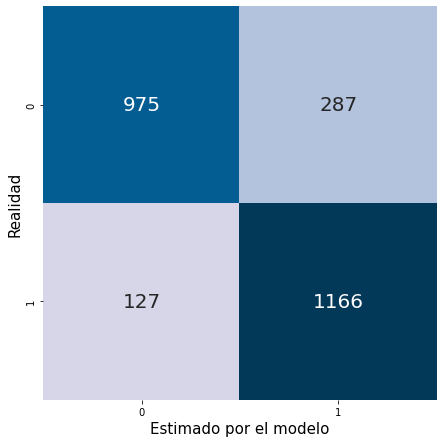

In [183]:
y_train_pred = np.round(model4.predict(X_train))
y_train_pred = np.squeeze(y_train_pred)
y_train_pred[y_train_pred==-1]=0
cnf_matrix= matriz_de_confusion(y_train, y_train_pred)

In [184]:
metricas(cnf_matrix,y_train,y_train_pred)

Precisión: 0.8024776324845148
Exactitud: 0.8379647749510764
Sensibilidad: 0.9017788089713844
Especificidad: 0.7725832012678289


20/20 [==============================] - 0s 2ms/step


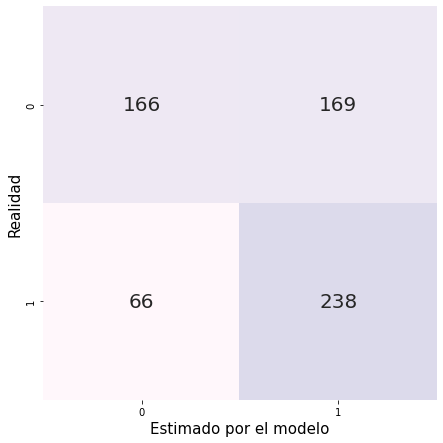

In [185]:
y_pred = np.round(model4.predict(X_test))
y_pred = np.squeeze(y_pred)
y_pred[y_pred == -1] = 0
cnf_matrix= matriz_de_confusion(y_test, y_pred)

In [186]:
metricas(cnf_matrix,y_test,y_pred)

Precisión: 0.5847665847665847
Exactitud: 0.6322378716744914
Sensibilidad: 0.7828947368421053
Especificidad: 0.4955223880597015


# Resumen de los modelos

In [187]:
scores=model4.evaluate(X_test, y_test, verbose=0)

res = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'kNN', 'K-means', 'Random Forest', 'Naive Bayes', 'SVM', 'Red neuronal'],
    'Exactitud': [logreg.score(X_test, y_test), knn.score(X_test, y_test), metrics.accuracy_score(y_test, labels), bosque.score(X_test, y_test), gnb.score(X_test, y_test), vector.score(X_test, y_test) , scores[1]]
    })

In [188]:
res

,Modelo,Exactitud
0,Regresión Logística,0.5102
1,kNN,0.6510
2,K-means,0.4804
3,Random Forest,0.6854
4,Naive Bayes,0.5352
5,SVM,0.6886
6,Red neuronal,0.6322


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Modelo')

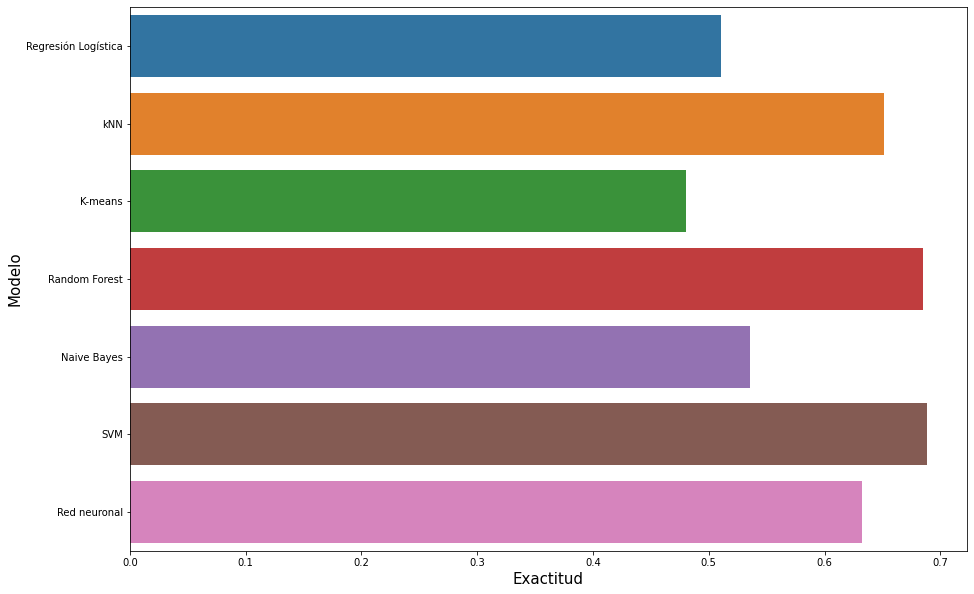

In [189]:
plt.figure(figsize = (15, 10))
sns.barplot(res['Exactitud'], res['Modelo'])
plt.xlabel('Exactitud', fontsize = 15)
plt.ylabel('Modelo', fontsize = 15)